In [2]:
import pandas as pd
import numpy as np
import json
import requests
from IPython.display import HTML

In [3]:
# First page of data from entire list
response = requests.get('https://api.fbi.gov/wanted/v1/list', params={
    'page': 1
})
data = json.loads(response.content)
page_one_df = pd.DataFrame(data['items'])

In [4]:
database_length = data['total']
col_total = page_one_df.shape[1]
rows_total = page_one_df.shape[0]
pages_total = database_length // rows_total + 1

print(f"Each page of the JSON data has {rows_total} rows and {col_total} columns.")

print(f"The entire database has {database_length} entries.")

print(f"There are {pages_total} total pages of data in the database.\n")

Each page of the JSON data has 20 rows and 54 columns.
The entire database has 988 entries.
There are 50 total pages of data in the database.


In [5]:
page_one_df.columns

Index(['race_raw', 'dates_of_birth_used', 'person_classification',
       'possible_countries', 'complexion', 'publication', 'languages', 'ncic',
       'eyes', 'subjects', 'remarks', 'path', 'uid', 'status', 'locations',
       'aliases', 'images', 'possible_states', 'eyes_raw', 'title', 'files',
       'description', 'weight', 'place_of_birth', 'legat_names', 'age_range',
       'modified', 'caution', 'reward_min', 'age_min', 'hair', 'suspects',
       'race', 'scars_and_marks', 'coordinates', 'sex', 'reward_max',
       'nationality', 'poster_classification', 'height_max', 'details',
       'occupations', 'weight_max', 'additional_information', 'weight_min',
       'age_max', 'height_min', 'field_offices', 'build', 'hair_raw',
       'reward_text', 'warning_message', 'url', '@id'],
      dtype='object')

In [6]:
database_cols = ['modified', 'possible_countries', 'person_classification',
       'dates_of_birth_used', 'race_raw', 'place_of_birth', 'weight',
       'description', 'nationality', 'sex', 'build', 'scars_and_marks', 'race',
       'suspects', 'hair', 'caution', 'field_offices', 'height_min', 'age_max',
       'images', 'weight_min', 'additional_information', 'locations',
       'weight_max', 'status', 'age_min', 'uid', 'height_max',
       'warning_message', 'reward_text', 'hair_raw', 'files', 'title',
       'reward_max', 'age_range', 'legat_names', 'poster_classification',
       'path', 'remarks', 'subjects', 'eyes', 'ncic', 'languages',
       'reward_min', 'publication', 'complexion', 'occupations',
       'possible_states', 'details', 'url', 'aliases', 'eyes_raw',
       'coordinates', '@id']

In [8]:
def get_wanted_data():
       page = 1
       database = pd.DataFrame(columns = database_cols)
       for item in range(10):
              current_response = requests.get('https://api.fbi.gov/wanted/v1/list', params={'page': page})
              current_data = json.loads(current_response.content)
              current_df = pd.DataFrame(current_data['items'])
              database = pd.concat([database,current_df])
              if page % 10 == 0:
                     print(f"Pages up through page {page} have been added to database...")
              page += 1
       print("All pages have been added. Database is loaded completely")
       return database

In [9]:
database = get_wanted_data() # Only get first 10 pages due to the limitation of API called.

Pages up through page 10 have been added to database...
All pages have been added. Database is loaded completely


In [26]:
df = database.copy()
total_rows = df.shape[0]
total_cols = df.shape[1]
print(f"The dataframe contains {total_rows} rows and {total_cols} columns")
df.info()

The dataframe contains 200 rows and 54 columns
<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 19
Data columns (total 54 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   modified                200 non-null    object 
 1   possible_countries      25 non-null     object 
 2   person_classification   200 non-null    object 
 3   dates_of_birth_used     95 non-null     object 
 4   race_raw                148 non-null    object 
 5   place_of_birth          85 non-null     object 
 6   weight                  143 non-null    object 
 7   description             200 non-null    object 
 8   nationality             81 non-null     object 
 9   sex                     178 non-null    object 
 10  build                   19 non-null     object 
 11  scars_and_marks         70 non-null     object 
 12  race                    148 non-null    object 
 13  suspects                3 non-null      object 
 14  h

In [9]:
df.sample(n=10)

,modified,possible_countries,person_classification,dates_of_birth_used,race_raw,place_of_birth,weight,description,nationality,sex,...,publication,complexion,occupations,possible_states,details,url,aliases,eyes_raw,coordinates,@id
18,2024-05-14T00:11:12+00:00,None,Main,"[September 2, 1987]",White (Hispanic),"Cuscatancingo, San Salvador, El Salvador",None,Conspiracy to Provide and Conceal Material Sup...,Salvadoran,Male,...,2022-10-03T09:05:00,None,None,None,None,https://www.fbi.gov/wanted/cei/edwin-ernesto-c...,"[""Renuente de Abriles Dangers""]",None,[],https://api.fbi.gov/@wanted-person/cd626d1aedf...
2,2024-05-14T00:10:31+00:00,"[KWT, USA]",Main,"[May 25, 1963]",None,Kuwait,209 pounds,,None,Male,...,2010-08-03T16:00:00,Olive,None,None,<p>Amer El-Maati is wanted for questioning in ...,https://www.fbi.gov/wanted/terrorinfo/amer-el-...,"[Amro Badr Eldin Abou El-Maati, Amro Badr Abou...",Brown,[],https://api.fbi.gov/@wanted-person/93897fbb508...
18,2024-05-14T00:10:52+00:00,None,Main,None,White,None,None,"Buckeye, Arizona\r\nJuly 6, 1993",None,Male,...,2016-08-19T13:53:00,None,None,None,"<p>On July 6, 1993, construction workers found...",https://www.fbi.gov/wanted/vicap/unidentified-...,None,None,[],https://api.fbi.gov/@wanted-person/70dbb4e1fa3...
11,2024-05-14T00:10:17+00:00,None,Main,None,None,None,None,Conspiring to Commit Computer Fraud; Accessing...,None,,...,2014-05-19T07:00:00,None,None,None,None,https://www.fbi.gov/wanted/cyber/huang-zhenyu,"[Huang Zhen Yu, “hzy_lhx”]",None,[],https://api.fbi.gov/@wanted-person/589af581-85...
7,2024-05-14T00:10:13+00:00,None,Main,"[August 4, 1978]",None,Iran,170 to 180 pounds,Conspiracy to Commit Computer Fraud; Computer ...,Iranian,Male,...,2017-06-27T09:29:00,None,None,None,None,https://www.fbi.gov/wanted/cyber/mohammad-reza...,"[Mohammad Rezekhah, Mohammed Reza Rezekhah]",Brown,[],https://api.fbi.gov/@wanted-person/6a072e35ebf...
3,2024-05-14T00:10:49+00:00,None,Victim,None,White,None,220 pounds,"Smiths Grove, Kentucky\r\nJune 19, 1999",None,Male,...,2012-04-19T07:00:00,None,None,None,"<p>On June 19, 1999, Walter Greg Fowler's wife...",https://www.fbi.gov/wanted/vicap/missing-perso...,None,Blue,[],https://api.fbi.gov/@wanted-person/0e6e9fc7b45...
11,2024-05-14T00:11:16+00:00,None,Main,None,None,None,None,"Homicide Victim\r\nPortland, Oregon\r\nDecembe...",None,None,...,2021-10-18T08:07:00,None,None,None,"<p>On December 11, 2020, 23-year-old Dhulfiqar...",https://www.fbi.gov/wanted/seeking-info/dhulfi...,None,None,[],https://api.fbi.gov/@wanted-person/8a3744a5b32...
3,2024-05-14T00:09:51+00:00,"[BEL, CAN, FRA, MEX, USA]",Main,"[November 22, 1953]",White,"Sacramento, California",165 pounds,Unlawful Flight to Avoid Prosecution - Failure...,American,Male,...,2010-08-31T04:55:00,None,"[Licensed Chiropractor, Acupuncturist]",[US-CA],None,https://www.fbi.gov/wanted/additional/steven-e...,"[""Geno"", ""Doc""]",Blue,[],https://api.fbi.gov/@wanted-person/650c7a28eb2...
5,2024-05-14T00:10:48+00:00,None,Victim,None,White (Hispanic),None,150 pounds (approximately),"Mount Morris, Michigan\r\nOctober 1-15, 2011",None,Female,...,2014-05-02T07:00:00,None,None,None,"<p>On or about October 21, 2011, Sylvia June G...",https://www.fbi.gov/wanted/vicap/missing-perso...,None,Brown,[],https://api.fbi.gov/@wanted-person/bc09345b-20...
10,2024-05-14T00:11:07+00:00,None,Victim,None,None,None,None,"Murder Victim\r\nOakland, California\r\nFebrua...",None,None,...,2018-07-02T10:33:00,None,None,None,"<p>On February 3, 2018, Patrick Scott, Jr. was...",https://www.fbi.gov/wanted/seeking-info/patric...,None,None,[],https://api.fbi.gov/@wanted-person/6bc39f5fe60...


In [27]:
"""Retaining necessary columns"""
cols_to_retain = ['title', 'images', 'field_offices', 'files', 'details', 'subjects', 'nationality', 'sex', 'race_raw', 'dates_of_birth_used', 'warning_message', 'reward_text']
df = df[cols_to_retain]

In [28]:
print('There are', df.title.isna().sum(),'missing values in the title columns.')
df.rename(columns={'title':'name'},inplace=True)

There are 0 missing values in the title columns.


In [13]:
df.files.head()

0    [{'name': 'English', 'url': 'https://www.fbi.g...
1    [{'name': 'English', 'url': 'https://www.fbi.g...
2    [{'name': 'English', 'url': 'https://www.fbi.g...
3    [{'name': 'English', 'url': 'https://www.fbi.g...
4    [{'name': 'English', 'url': 'https://www.fbi.g...
Name: files, dtype: object

In [29]:
""" Parse files column to extract URL """
print(df.files.iloc[0])
print(df.files.iloc[0][0])
print(df.files.iloc[0][0]['url'])

[{'name': 'English', 'url': 'https://www.fbi.gov/wanted/law-enforcement-assistance/gavino-huerta-jr/download.pdf'}]
{'name': 'English', 'url': 'https://www.fbi.gov/wanted/law-enforcement-assistance/gavino-huerta-jr/download.pdf'}
https://www.fbi.gov/wanted/law-enforcement-assistance/gavino-huerta-jr/download.pdf


In [30]:
def get_url(row,key):
       return row[0][key]

urls = df.apply(lambda row: get_url(row['files'],'url'),axis=1)
df['poster'] = urls
df.drop(columns=['files'],inplace=True)

In [31]:
df['poster']

0     https://www.fbi.gov/wanted/law-enforcement-ass...
1     https://www.fbi.gov/wanted/seeking-info/tyah-s...
2     https://www.fbi.gov/wanted/murders/mtayari-dix...
3     https://www.fbi.gov/wanted/wanted_terrorists/a...
4     https://www.fbi.gov/wanted/wanted_terrorists/a...
                            ...                        
15    https://www.fbi.gov/wanted/additional/murray-g...
16    https://www.fbi.gov/wanted/additional/ashley-c...
17    https://www.fbi.gov/wanted/additional/kofi-edw...
18    https://www.fbi.gov/wanted/additional/leslie-c...
19    https://www.fbi.gov/wanted/additional/mauro-oc...
Name: poster, Length: 200, dtype: object

In [33]:
""" Parse images column to keep one main image only """
print(df.images.iloc[0])
print('=================')
print(df.images.iloc[0][0])
print('=================')
print(df.images.iloc[0][0]['original'])


[{'thumb': 'https://www.fbi.gov/wanted/law-enforcement-assistance/gavino-huerta-jr/@@images/image/thumb', 'large': 'https://www.fbi.gov/wanted/law-enforcement-assistance/gavino-huerta-jr/@@images/image/large', 'caption': 'Photograph taken in 2022', 'original': 'https://www.fbi.gov/wanted/law-enforcement-assistance/gavino-huerta-jr/@@images/image'}, {'thumb': 'https://www.fbi.gov/wanted/law-enforcement-assistance/gavino-huerta-jr/huerta2.jpg/@@images/image/thumb', 'large': 'https://www.fbi.gov/wanted/law-enforcement-assistance/gavino-huerta-jr/huerta2.jpg/@@images/image/large', 'caption': 'Right Arm Tattoo', 'original': 'https://www.fbi.gov/wanted/law-enforcement-assistance/gavino-huerta-jr/huerta2.jpg'}, {'thumb': 'https://www.fbi.gov/wanted/law-enforcement-assistance/gavino-huerta-jr/huerta3.jpg/@@images/image/thumb', 'large': 'https://www.fbi.gov/wanted/law-enforcement-assistance/gavino-huerta-jr/huerta3.jpg/@@images/image/large', 'caption': 'Right Shin Tattoo', 'original': 'https://

In [34]:
images = df.apply(lambda row: get_url(row['images'],'original'),axis=1)

In [37]:
df.images = images

In [38]:
def path_to_image_html(path):
       return 'img src="' + path + '" width="125"'

In [39]:
HTML(df[0:6][['name', 'images']].to_html(escape=False, formatters=dict(image=path_to_image_html)))

,name,images
0,"GAVINO HUERTA, JR.",https://www.fbi.gov/wanted/law-enforcement-assistance/gavino-huerta-jr/@@images/image
1,TY'AH SETTLES,https://www.fbi.gov/wanted/seeking-info/tyah-settles/@@images/image
2,MTAYARI DIXON,https://www.fbi.gov/wanted/murders/mtayari-dixon/@@images/image
3,AHMAD IBRAHIM AL-MUGHASSIL,https://www.fbi.gov/wanted/wanted_terrorists/ahmad-ibrahim-al-mughassil/@@images/image
4,ALI ATWA,https://www.fbi.gov/wanted/wanted_terrorists/ali-atwa/@@images/image
5,MOHAMMED ALI HAMADEI,https://www.fbi.gov/wanted/wanted_terrorists/mohammed-ali-hamadei/@@images/image


In [40]:
"""Missing persons"""
df.details = df.details.astype('str')

In [41]:
missing_person = df.details.str.contains('missing person')
went_missing = df.details.str.contains('went missing')
has_been_missing = df.details.str.contains('has been missing')
foul_play = df.details.str.contains('foul play')
reported_missing = df.details.str.contains('reported missing')

# Filtering missing df
missing_df = df.loc[missing_person | went_missing | has_been_missing | foul_play | reported_missing]

In [42]:
missing_df.details

4     <p>On Thursday, October 26, 1995, James S. Rul...
5     <p>The Federal Bureau of Investigation's Seatt...
11    <p>On February 7, 2011, 28-year-old William "B...
12    <p>On June 19, 1999, Walter Greg Fowler's wife...
13    <p>On Sunday, September 3, 2000, at approximat...
14    <p>On or about October 21, 2011, Sylvia June G...
17    <p>Lankester-Cox was last seen leaving his Acw...
19    <p>On March 17, 1998, Shannon Elaine Arif was ...
2     <p>On June 20, 1993, Sarah Ann Norfleet was dr...
4     <p>On April 8, 2011, Robert Lee Hourihan disap...
5     <p>On Friday, October 31, 1969, Patricia Spenc...
6     <p>On Friday, October 31, 1969, Pamela Sue Hob...
13    <p>On June 8, 2012, Lisa Marie Knight went mis...
14    <p>Lori Dea Julian has been missing since July...
15    <p>On July 15, 1991, Katherine Dolan Heckel wa...
16    <p>On Sunday, July 29, 2012, Kortne Ciera Stou...
18    <p>Kimberly Sue Jones was last seen by neighbo...
19    <p>At approximately 2030 hours, October 15

In [43]:
print("There are", missing_df.shape[0], 'out of',df.shape[0], 'records that are very likely missing persons.')

There are 26 out of 200 records that are very likely missing persons.


In [44]:
"""Convert dates_of_birth_used col from obj to datetime"""
df.dates_of_birth_used

0                  [November 16, 1988]
1                                 None
2                  [December 20, 1992]
3                      [June 26, 1967]
4                 [Approximately 1960]
                    ...               
15                 [February 25, 1947]
16                    [April 28, 1984]
17    [March 23, 1973, March 29, 1973]
18                    [March 21, 1946]
19                    [April 18, 1969]
Name: dates_of_birth_used, Length: 200, dtype: object

In [45]:
# Using .explode to transform each element of list-like to rows, replicating index values
df = df.explode('dates_of_birth_used')

In [46]:
df.dates_of_birth_used = pd.to_datetime(df.dates_of_birth_used, errors="coerce").dt.date
df.rename(columns= {'dates_of_birth_used':'birthdates_used'},inplace=True)

In [47]:
df.birthdates_used.sample(n=10)

3            NaT
6            NaT
1            NaT
18    1986-07-27
5     1981-08-31
19           NaT
7            NaT
2     1992-12-20
18           NaT
7            NaT
Name: birthdates_used, dtype: object

In [48]:
""" Categorize subjects column"""
df.subjects.sample(n=5)

17                  [ViCAP Missing Persons]
15              [Additional Violent Crimes]
3                   [ViCAP Missing Persons]
15                    [Seeking Information]
16    [Seeking Information, Indian Country]
Name: subjects, dtype: object

In [49]:
df = df.explode('subjects')

In [50]:
df.rename(columns={'subjects':'category'},inplace=True)

In [51]:
df.category.value_counts()

category
ViCAP Missing Persons                  56
Cyber's Most Wanted                    39
Additional Violent Crimes              38
Counterintelligence                    25
Seeking Information                    15
China Threat                           14
ViCAP Unidentified Persons             10
ViCAP Homicides and Sexual Assaults    10
ECAP                                    8
Most Wanted Terrorists                  8
Criminal Enterprise Investigations      8
Indian Country                          6
Seeking Information - Terrorism         5
John Doe                                3
Kidnappings and Missing Persons         3
White-Collar Crime                      2
Human Trafficking                       2
Navajo                                  2
Violent Crime - Murders                 2
White Collar Crimes                     1
Case of the Week                        1
Endangered Child Alert Program          1
Iran                                    1
Law Enforcement Assistanc

<Axes: title={'center': 'Top 10 Most Frequent Categories'}, ylabel='category'>

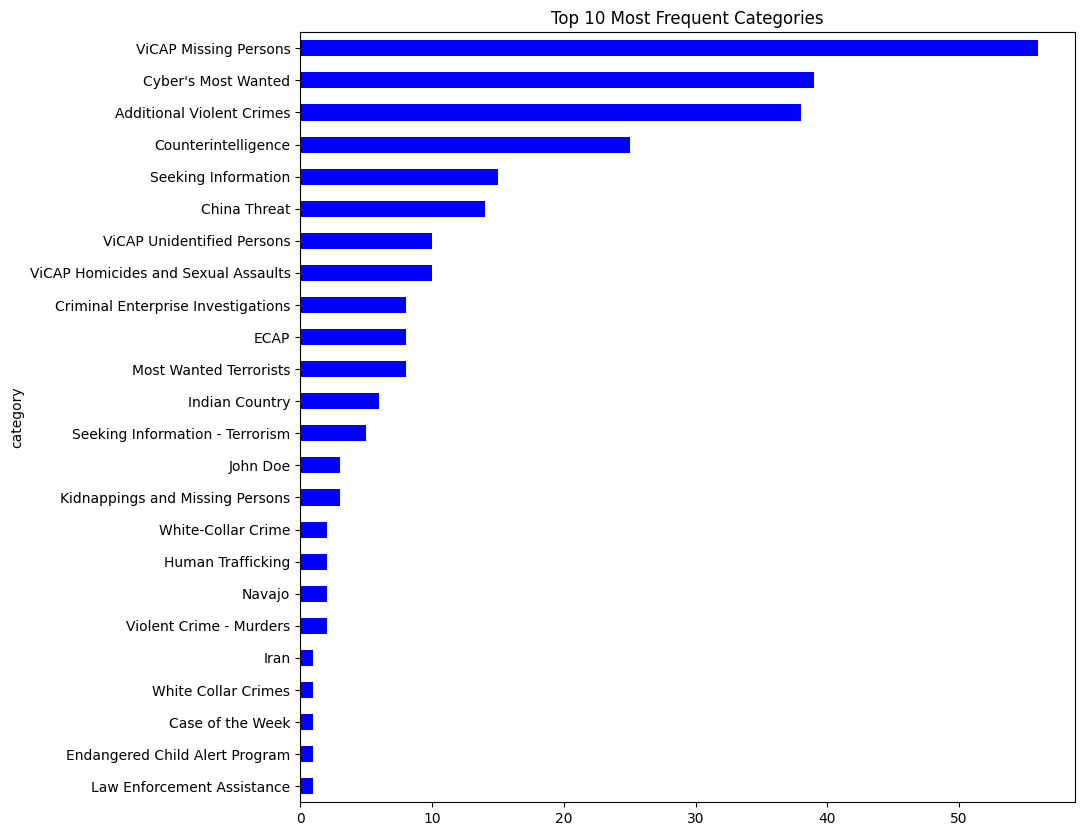

In [52]:
df.category.value_counts().sort_values().plot(kind='barh', title= 'Top 10 Most Frequent Categories', color = 'blue',figsize=(10,10))

In [53]:
"""Field Offices column"""
df.field_offices.sample(10)

13      [sacramento]
0      [albuquerque]
4               None
7     [washingtondc]
10         [seattle]
14     [minneapolis]
15              None
6          [newyork]
19              None
8       [cincinnati]
Name: field_offices, dtype: object

In [54]:
df = df.explode('field_offices')

In [55]:
df.field_offices.unique()


array(['chicago', 'washingtondc', 'newyork', 'denver', None,
       'oklahomacity', 'losangeles', 'houston', 'seattle', 'portland',
       'phoenix', 'boston', 'albuquerque', 'cincinnati', 'charlotte',
       'philadelphia', 'minneapolis', 'newark', 'sanfrancisco',
       'sacramento', 'cleveland', 'miami', 'atlanta', 'columbia', 'omaha',
       'pittsburgh', 'lasvegas', 'albany', 'kansascity', 'tampa',
       'mobile'], dtype=object)

In [56]:
map_field_names = {
    'newyork': 'New York',
    'washingtondc': 'Washington D.C.',
    'sanfrancisco': 'San Francisco',
    'losangeles': 'Los Angeles',
    'saltlakecity': 'Salt Lake City',
    'kansascity': "Kansas City",
    'sandiego': 'San Diego',
    'littlerock': "Little Rock",
    'lasvegas': 'Las Vegas',
    'stlouis': 'St. Louis',
    'oklahomacity': 'Oklahoma City',
    'elpaso': 'El Paso',
    'neworleans': 'New Orleans',
    'sanjuan': 'San Juan',
    'sanantonio': 'San Antonio',
    'newhaven': 'New Haven'
}
df.field_offices = df.field_offices.map(map_field_names)

In [57]:
df.field_offices.value_counts()

field_offices
New York           40
Washington D.C.    17
Los Angeles         4
San Francisco       4
Oklahoma City       3
Kansas City         3
Las Vegas           1
Name: count, dtype: int64

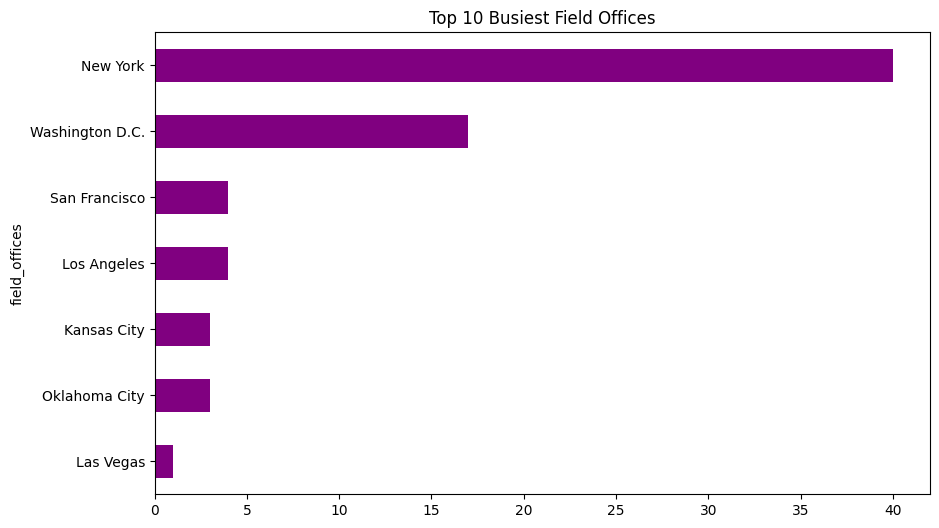

In [58]:
df.field_offices.value_counts().sort_values().plot(kind = 'barh', title="Top 10 Busiest Field Offices", color = 'purple', figsize=(10, 6));

In [59]:
"""Nationality column"""
df.nationality.unique()

array(['American', None, 'Saudi Arabian', 'Lebanese', 'Russian',
       'Salvadoran', 'Mexican', 'United States', 'Vietnamese', 'Chinese',
       'Pakistani', 'Spanish', 'Ukrainian', 'Singaporean', 'Haitian',
       'Seychellois', 'Unknown', '', 'Yemeni', 'Canadian', 'Iranian',
       'Swedish', 'Indian', 'Syrian', 'Latvian', 'Bangladeshi',
       'Honduran', 'Venezuelan'], dtype=object)

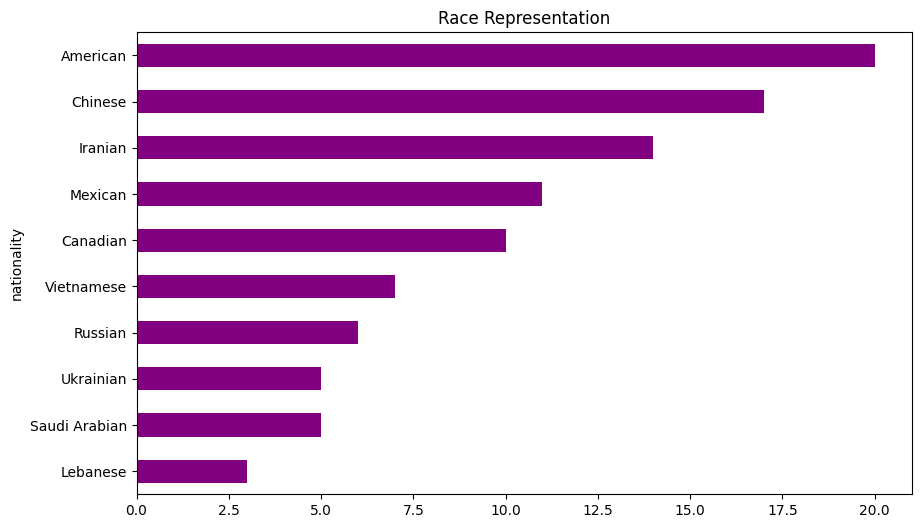

In [60]:
df.nationality.value_counts().head(10).sort_values().plot(kind = 'barh', title="Race Representation", color = 'purple', figsize=(10, 6));

In [61]:
"""Sex column"""
df.sex.value_counts(dropna=False)

sex
Male      172
Female     48
None       29
           14
Name: count, dtype: int64

In [62]:
df.sex.replace(['',None],np.nan,inplace=True)

In [63]:
df.sex.value_counts(dropna=False)

sex
Male      172
Female     48
NaN        43
Name: count, dtype: int64

In [64]:
df.sex = df.sex.astype('category')

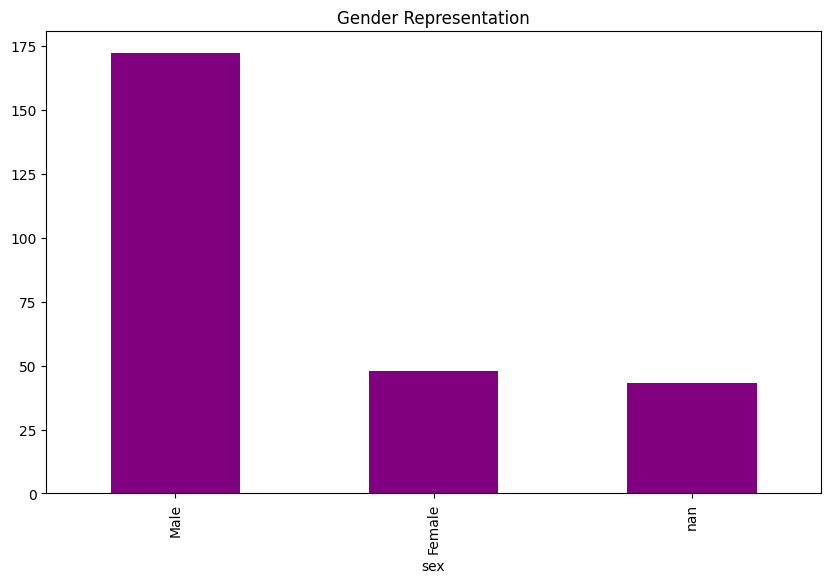

In [65]:
df.sex.value_counts(dropna = False).sort_values(ascending = False).plot(kind = 'bar', title="Gender Representation", color = 'purple', figsize=(10, 6));

In [66]:
"""Race raw column"""
df.race_raw.value_counts(dropna = False)

race_raw
White                                     108
None                                       72
Asian                                      26
White (Hispanic)                           24
Black                                      11
Native American                             8
Hispanic                                    3
Native American/Alaskan Native              2
                                            2
White (Middle Eastern)                      2
White/Asian                                 1
Black (light complexion or mixed race)      1
Hispanic or Latino                          1
White (Indian)                              1
White (Central Asian)                       1
Name: count, dtype: int64

In [67]:
df.race_raw.replace(['', 'Unknown', None, ], np.nan, inplace = True)
df.race_raw = df.race_raw.str.lower()

In [68]:
# Creating mask
hispanic_mask = df.race_raw.str.contains("hispanic") | df.race_raw.str.contains("latino")
asian_mask = df.race_raw.str.contains("asian") | df.race_raw.str.contains("vietnamese") 
middle_eastern_mask = df.race_raw.str.contains("middle eastern") | df.race_raw.str.contains("persian") | \
                     df.race_raw.str.contains("kuwaitian") # The proper term is Kuwaiti
black_mask = df.race_raw.str.contains("black", na=False)
native_american_mask = df.race_raw.str.contains("native american", na=False)
white_mask = df.race_raw.str.contains("white", na=False) | df.race_raw.str.contains("bi-racial", na=False)

In [69]:
df.race_raw = df.race_raw.astype(str)
df.race_raw = df.race_raw.mask(hispanic_mask, 'hispanic')
df.race_raw = df.race_raw.mask(asian_mask, 'asian')
df.race_raw = df.race_raw.mask(middle_eastern_mask, 'middle eastern')
df.race_raw = df.race_raw.mask(native_american_mask, "native american")
df.race_raw = df.race_raw.mask(black_mask, 'black')
df.race_raw = df.race_raw.mask(white_mask, 'white')

In [70]:
df.race_raw.value_counts()

race_raw
white              137
nan                 74
asian               26
black               12
native american     10
hispanic             4
Name: count, dtype: int64

<Axes: title={'center': 'Race Demographics'}, xlabel='race_raw'>

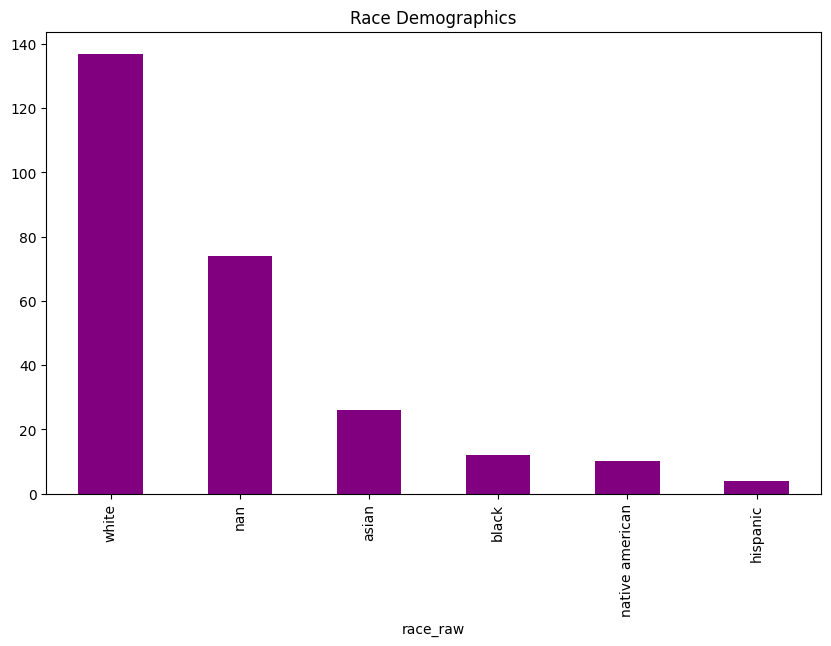

In [71]:
df.race_raw.value_counts().sort_values(ascending = False).plot(kind = 'bar', title="Race Demographics", color = 'purple', figsize=(10, 6))

In [72]:
df.warning_message = df.warning_message.str.lower()

In [74]:
df.warning_message.value_counts()

warning_message
should be considered armed and dangerous                                                                        33
should be considered an international flight risk                                                               24
should be considered an escape risk                                                                             11
should be considered armed and dangerous and an escape risk                                                      8
should be considered armed and dangerous and an international flight risk                                        7
should be considered armed and extremely dangerous and a high-risk arrest                                        3
considered armed and extremely dangerous and an escape risk                                                      3
should be considered a flight risk                                                                               2
should be considered dangerous and an escape risk               

In [75]:
armed_dangerous_mask = df.warning_message.str.contains("armed", na=False)
flight_risk_mask = df.warning_message.str.contains("flight", na=False) | \
                   df.warning_message.str.contains("international", na=False) | \
                   df.warning_message.str.contains("escape", na=False) 
extremely_dangerous_mask = df.warning_message.str.contains("extremely", na=False)
mental_health_mask = df.warning_message.str.contains("suicidal", na=False) | \
                     df.warning_message.str.contains("medications", na=False)
# Applying mask
df.race_raw = df.race_raw.astype(str)
df.warning_message = df.warning_message.mask(armed_dangerous_mask, 'armed and dangerous')
df.warning_message = df.warning_message.mask(flight_risk_mask, 'fligth/escape risk')
df.warning_message = df.warning_message.mask(extremely_dangerous_mask, 'extremely dangerous')
df.warning_message = df.warning_message.mask(mental_health_mask, 'mental health concern')
df.warning_message = df.warning_message.replace("", np.nan)

In [76]:
df.rename(columns = {"warning_message": "warning"}, inplace = True)
df.warning.value_counts()

warning
fligth/escape risk                56
armed and dangerous               33
extremely dangerous                6
should be considered dangerous     1
Name: count, dtype: int64

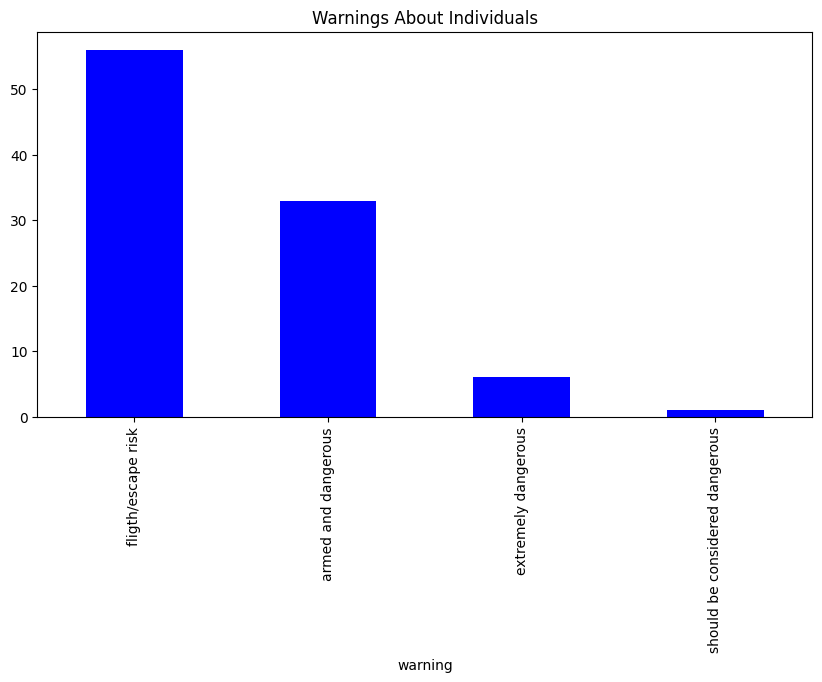

In [77]:
df.warning.value_counts().sort_values(ascending = False).plot(kind = 'bar', title="Warnings About Individuals", color = 'blue', figsize=(10, 5));

In [81]:
armed_and_dangerous_filter = df.warning.str.contains("armed and dangerous", na=False)
armed_and_dangerous = df[armed_and_dangerous_filter]
samples = armed_and_dangerous[['name', 'images', 'category', 'field_offices', 'warning']].sample(15)


In [82]:
HTML(samples.to_html(escape = False, formatters=dict(image=path_to_image_html)))


,name,images,category,field_offices,warning
10,ABDULLAH AL-RIMI,https://www.fbi.gov/wanted/terrorinfo/abdullah-al-rimi/@@images/image,Seeking Information - Terrorism,New York,armed and dangerous
11,AMER EL-MAATI,https://www.fbi.gov/wanted/terrorinfo/amer-el-maati/@@images/image,Seeking Information - Terrorism,NaN,armed and dangerous
10,EDWIN ERNESTO CEDILLOS-RODRIGUEZ,https://www.fbi.gov/wanted/cei/edwin-ernesto-cedillos-rodriguez/@@images/image,Criminal Enterprise Investigations,NaN,armed and dangerous
9,ABDELKARIM HUSSEIN MOHAMED AL-NASSER,https://www.fbi.gov/wanted/wanted_terrorists/abdelkarim-hussein-mohamed-al-nasser/@@images/image,Most Wanted Terrorists,Washington D.C.,armed and dangerous
6,IBRAHIM SALIH MOHAMMED AL-YACOUB,https://www.fbi.gov/wanted/wanted_terrorists/ibrahim-salih-mohammed-al-yacoub/@@images/image,Most Wanted Terrorists,Washington D.C.,armed and dangerous
14,SEMION MOGILEVICH,https://www.fbi.gov/wanted/cei/semion-mogilevich/@@images/image,Criminal Enterprise Investigations,NaN,armed and dangerous
11,CESAR MUNGUIA,https://www.fbi.gov/wanted/additional/cesar-munguia/@@images/image,Additional Violent Crimes,New York,armed and dangerous
7,ALI SAED BIN ALI EL-HOORIE,https://www.fbi.gov/wanted/wanted_terrorists/ali-saed-bin-ali-el-hoorie/@@images/image,Most Wanted Terrorists,Washington D.C.,armed and dangerous
0,"GAVINO HUERTA, JR.",https://www.fbi.gov/wanted/law-enforcement-assistance/gavino-huerta-jr/@@images/image,Law Enforcement Assistance,NaN,armed and dangerous
17,KOFI EDWARDS,https://www.fbi.gov/wanted/additional/kofi-edwards/@@images/image,Additional Violent Crimes,NaN,armed and dangerous
